# Jupyter Notebook UI to graph your speed trace (with opto) data!

Version 1.3 - Joseph Liang, Rankin Lab
Updated:
1. Upgraded folder path selection application
2. Upgraded dataset management (less moving parts for end-user)
3. output changed from tif -> png

## Known bug: Step 2 an empty windows displays in Mac. May also apply to linux/windows.

## Beginner Essentials:
1. Shift-Enter to run each cell. After you run, you should see an output "done step #". If not, an error has occured
2. When inputting your own code/revising the code, make sure you close all your quotation marks '' and brackets (), [], {}.
3. Don't leave any commas (,) hanging! (make sure an object always follows a comma. If there is nothing after a comma, remove the comma!
4. Learning to code? Each line of code is annotated to help you understand how this code works!

## 3. Run all cells/steps sequentially, even the ones that do not require input

## Steps that require input: #3, #6.1, #7

# 1. Importing Packages Required (No input required, just run)

In [1]:
import pandas as pd #<- package used to import and organize data
import numpy as np #<- package used to import and organize data
import seaborn as sns #<- package used to plot graphs
from matplotlib import pyplot as plt #<- package used to plot graphs
import os #<- package used to work with system filepaths
from ipywidgets import widgets #<- widget tool to generate button
from IPython.display import display #<- displays button
# from tkinter import Tk, filedialog #<- Tkinter is a GUI package
from tqdm.notebook import tqdm
from ipyfilechooser import FileChooser
# import dask.dataframe as dd
import pingouin as pg
import random
pd.set_option('display.max_columns', 50)
print("done step 1")

done step 1


# 2. Pick filepath (just run and click button)

Run the following cell and clicke the button 'Select Folder' to pick a filepath.

## Important: Later on, this script uses the total file path for each file to import and group data. That means if your folder has whatever your strain is named, the script will not work.

(ex. if your folder has "N2" in it this script sees all files inside this folder as having the "N2" search key)

## An easy fix is to just rename your folder to something else (make your strains lower-case, or just have the date)

In [2]:
starting_directory='/Users/Joseph/Desktop/'
chooser=FileChooser(starting_directory)
display(chooser)

FileChooser(path='/Users/Joseph/Desktop', filename='', title='', show_hidden=False, select_desc='Select', chan…

In [3]:
folder_path=chooser.selected_path
print(folder_path)

/Users/Joseph/Desktop/Aging_BSR_July12_2025


In [ ]:
# *********** OBSOLETE ***********
# ### Select Folder App - After you run, you can select your folder for filepath
# button = widgets.Button(description = 'Select Folder') #<- creates a button variable
# display(button) #<- displays the button in output

# def select_folder(b): #<- defines an action. This action requires a variable, so an arbitrary one 'b' is there
#     global folder_path #<- sets a variable as a global variable, not just within this action
#     #Tk().withdraw() #<- Tkinter likes to create annoying empty windows. This removes them
#     folder_path = filedialog.askdirectory() #<- Opens up a file explorer window, and determines folder path
#     #Tk().update() #<- below
#     #Tk().destroy() #<- this and the line above it removes the file explorer window after a selection is made
#     print(folder_path) #<- this helps confirm that this action was performed
#     print('done step 2')
# button.on_click(select_folder)

# 3. User Defined Variables (Add input here)

Here, we add some constants to help you blaze through this code.

## 3.1: Setting time bins
pretty self explanatory



## 3.2: Setting view range for your graph
Top, bottom = y axis view range
left, right = x axis view range



In [4]:
# Setting 1s Bins: for 0.5s Bins: 0,360,721
# bins = np.linspace(0,360,721) #<- np.linspace(start, end, steps in between)
# bins = np.linspace(0,420,841) #<- np.linspace(start, end, steps in between)
bins = np.linspace(0,420,421) # 1 second bins (smoother lines on graph)

print(bins)


print("done step 3")

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

# 4. Construct filelist from folder path (No input required, just run)

In [5]:
#folder_path = '/Users/Joseph/Desktop/lrk1_ATR_NoATR_08_15_2019'
print(folder_path)
os.chdir(folder_path) #<- setting your working directory so that your images will be saved here

filelist = list() #<- empty list
for root, dirs, files in os.walk(folder_path): #<- this for loop goes through your folder 
    for name in files:
        if name.endswith('.dat'): #<- and takes out all files with a .dat (file that contains your data)
            filepath = os.path.join(root, name) #<- Notes down the file path of each data file
            filelist.append(filepath) #<- saves it into the list
    
# print(filelist)
print('done step 4')

/Users/Joseph/Desktop/Aging_BSR_July12_2025
done step 4


In [ ]:
# 323421
print(len(filelist))

# 5. Process Data Function (No input required, just run)

In [ ]:
string=filelist[0]
print(string)
print('date')
print(string.split('/')[-3].split('_')[0])
print(string.split('/')[-3].split('_')[1])
# print(string.split('/')[6].split('_')[4].split('.')[0][1:5])
'/Volumes/JOSEPH/BSR/acr-3(ok2049)_OffFood/20230217_101835/RB1659_6x2_n72h20C_420s_C0217_RN1.00201.dat'
'/Volumes/JOSEPH/BSR/N2_OffFood/20220630_133223/N2_6x2_n72h20C_420s_A0630_NN1.00332.dat'

In [6]:
def ProcessData(strain): #<- an example of a user-defined function
    strain_filelist = []  #<- empty list
    for i in filelist: #<- goes through the list and filters for keyword
        if strain in i:
            strain_filelist.append(i)
    Strain_N = len(strain_filelist) #<- N per strain, or number of plates
    if Strain_N > 1000:
        strain_filelist = random.sample(strain_filelist,1000)
    Strain_N = len(strain_filelist)
    print(f'This Strain has {Strain_N} worms tracked') #<- prints out number of plates per strain
    for i, f in tqdm(enumerate(strain_filelist, start=1)): #<- a progress bar function integrated into data import
        N = len(strain_filelist)
        statement = f"Processing {i} of {N} worms" #<- progress bar statement
        try:
            DF_Read = pd.read_csv(f, sep=' ', skiprows = 0, header = None) #<- imports and cleans data
        except Exception:
            pass
        DF_Read['plate_id'] = f.split('/')[-2].split('_')[1]
        DF_Read['date'] = f.split('/')[-2].split('_')[0]
        if i==1:
            DF_Total = DF_Read
            DF_Total = DF_Total.dropna(axis=0)
            DF_Total["worm"]=i
#             DF_Total["x_0"] = DF_Total.iloc[:,2] - DF_Total.iloc[0,2]
#             DF_Total["y_0"] = DF_Total.iloc[:,3] - DF_Total.iloc[0,3]
#             pathlen_i = np.array(DF_Total.iloc[1:,5])
#             pathlen_i_1 = np.array(DF_Total.iloc[0:-1,5])
#             result = np.abs(pathlen_i - pathlen_i_1).tolist()
#             result.insert(0,0)
#             resultS=pd.Series(result)
#             DF_Total["distance"]=resultS.cumsum()
            DF_Total=DF_Total.dropna()
#             print(DF_Total)
        else:
            DF_Add = DF_Read
            DF_Add = DF_Add.dropna(axis=0)
            DF_Add["worm"]=i
#             DF_Add["x_0"] = DF_Add.iloc[:,2] - DF_Add.iloc[0,2]
#             DF_Add["y_0"] = DF_Add.iloc[:,3] - DF_Add.iloc[0,3]
#             pathlen_i = np.array(DF_Add.iloc[1:,5])
#             pathlen_i_1 = np.array(DF_Add.iloc[0:-1,5])
#             result = np.abs(pathlen_i - pathlen_i_1).tolist()
#             result.insert(0,0)
#             resultS=pd.Series(result)
#             DF_Add["distance"]=resultS.cumsum()
#             DF_Add = DF_Add.dropna()
            DF_Total = pd.concat((DF_Total, DF_Add), ignore_index = True)  #<- imports and cleans data
        # print(statement)
#         print(DF_Total)
    DF_Total = DF_Total.dropna(axis = 0) #<- more data cleaning
    DF_Total = DF_Total.rename( #<- more data cleaning
                {0:'time',
                1:'speed',
                2: "x",
                3: "y",
                4: "angularspeed",
                5: "pathlength",
                6: "kink",
                7: "bias",
                8: "curve",
                9: "dir",
                10: "crab",
                11: "length",
                12: "midline",
                13: "width",
                14: "morphwidth",
                15: "area"
                }, axis=1)
#     print(DF_Total)

    #0.5s Bins
    Bins = [float(i) for i in bins] #<- adds time bins into the data frame
    DF_Total['time_bin'] = pd.cut(DF_Total['time'], Bins, labels = Bins[1:])
    DF_Total['time_bin'] = DF_Total['time_bin'].astype(np.float64)
    DF_time_bin=DF_Total.groupby(["time_bin", "worm", "plate_id", "date"], as_index=False).mean()
    # DF_time_bin = DF_time_bin[(300 <= DF_time_bin["time_bin"])&(400 >= DF_time_bin["time_bin"])]
    
    # DF_time_bin=DF_Total.groupby(["date", "plate_id"], as_index=False).mean()
#     print(DF_time_bin)
    #     DF_Speed_DF = DF_Total[["time", "time_bin", "speed", "x", "y", "x_0","y_0", "pathlength", "worm"]].copy()
    
    return{
            'N': Strain_N,
            'Confirm':DF_time_bin, #DF_Total if want to non-binned data
#             'Speed_DF': DF_Speed_DF, #<- this is the finished product we will use for analysis
            'Filelist':strain_filelist} 

print('done step 5')

done step 5


# 6.1 Processing Data

In [ ]:
# TotalConcatenated[['Genotype', 'Treatment']] = TotalConcatenated['Strain'].str.split(' - ', 1, expand=True)
# print(list(set(filelist)))
# nfiles = list(range(1, len(filelist.unique())+1))
# print(nfiles)
# strainnames = []
strainnames=[]
for f in filelist:
    strainnames.append(f.split('/')[-3])
ustrainnames=list(set(strainnames))
print(ustrainnames)
ustrainnames.sort()
# # print(ustrainnames)
# ustrainnames.insert(0, ustrainnames.pop(ustrainnames.index("cat-2(e1112)_OnFood")))
# # print(ustrainnames)
# ustrainnames.insert(0, ustrainnames.pop(ustrainnames.index("cat-2(e1112)_OffFood")))

ustrainnames.insert(0, ustrainnames.pop(ustrainnames.index("N2_OnFood")))
# print(ustrainnames)
ustrainnames.insert(0, ustrainnames.pop(ustrainnames.index("N2_OffFood")))
# print(ustrainnames)
nstrains=list(range(1,len(ustrainnames)+1))
# print(nstrains)

StrainNames = {}
StrainNames = {nstrains[i]: ustrainnames[i] for i in range(len(nstrains))}
print("-"*50)
print(StrainNames)
print(len(StrainNames))
print("done step 6.1")

# <---------------- Test element to use for dictionary buidling -------------------
# s = '/Users/Joseph/Desktop/OnFoodOffFoodTest/N2_OnFood/20220401_163048/N2_10x1_n96h20C_360sA0401_ka.00065.dat'
# slist=s.split('/')[5]
# print(slist)
# print(list(range(1,5+1)))

['cat-2(e1112)_OffFood-10DO', 'cat-2(e1112)_OnFood-10DO']
--------------------------------------------------
{1: 'cat-2(e1112)_OffFood-10DO', 2: 'cat-2(e1112)_OnFood-10DO'}
2
done step 6.1


# 6.2 Process Data (just run this cell)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
DataLists = [0] #<- generates empty list. 0 is there to account for python's index starting at 0. 
# we want indexing to start at 1 (when I say #1 I want the first point, not the second point)

for s in tqdm(StrainNames.values()): #<- goes through the dictionary in step 6.1 and processes data
    if not s == '':
        DataLists.append(ProcessData(s)['Confirm']) #<- appends all data into a list of dataframes
# print(DataLists[2])
print('done step 6.2')

  0%|          | 0/2 [00:00<?, ?it/s]

This Strain has 425 worms tracked


0it [00:00, ?it/s]

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_1606/2466705225.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_1606/2466705225.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_1606/2466705225.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

This Strain has 533 worms tracked


0it [00:00, ?it/s]

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_1606/2466705225.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_1606/2466705225.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_1606/2466705225.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

done step 6.2


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_1606/2466705225.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


# Convert float64 data to float32 to reduce memory load (can also convert to 16 if needed)

For plain english:

float16 = 4 decimal points

float32 = 8 decimal points

float64 = 16 decimal points

more decimal points = more data/memory that computer has to keep track of

In [ ]:
#No need to run here
for n in tqdm(DataLists[1:]):
#     print(n)
    TestData=n
    TestData[TestData.select_dtypes(np.float64).columns] = TestData.select_dtypes(np.float64).astype(np.float16)
    print("done this strain")

In [ ]:
#No need to run here

# print(TotalConcatenated.dtypes)
TotalConcatenated['time_bin'] = TotalConcatenated['time_bin'].astype(np.float16)
# print(TotalConcatenated.dtypes)
# TotalConcatenated.dtypes
# Test Cell
# DataLists[1].to_csv("test.csv")
Test = TotalConcatenated.reset_index(drop=True)
print(Test)

# 7. Grouping Data and Naming (Optional: Add input here)

Here, you get to name your data groups/strain! Name your groups however you like under between the quotation marks for each strain.

For example: If your Strain1 is N2 and you wish for the group to be called N2,
your line should look like:

DataLists[x].assign(dataset = 'N2')

## Go back to step 6.1 to check which strain is which item on the DataLists.
In this example, the first item on DataLists is AQ2028_b.


## Remember: Put your name in quotes. (ex: 'N2' and not N2)

As default, the names are set to the unique identifier labels.

## Depending on the number of strains you are running the comparison, you may have to delete/add lines of code (following the same format). 
## Remember to add/delete commas too.

# If you want to change your groups, you do that here. 
For example, if you have 5 strains in your folder but only want to compare between 2 or 3 strains, designate that here and follow through with steps 6 and 7. Once you are done, come back to step 6 and change your groups again (You are going to have to change your graph titles for the second run-through though)!

In [10]:
TotalConcatenated=pd.concat(df.assign(Strain=StrainNames.get(i+1)) for i,df in enumerate(DataLists[1:]))
print(TotalConcatenated)
print(os.getcwd())

       time_bin  worm plate_id      date      time    speed          x  \
0           5.0   169   110719  20250712    4.6189  0.21630  24.144530   
1           5.0   201   104631  20250712    4.8720  0.25020  30.538550   
2           5.0   202   104631  20250712    4.8720  0.28850  32.679475   
3           5.0   308   104631  20250712    4.9535  0.22905  26.627600   
4           5.0   376   105316  20250712    4.8830  0.24160  27.276600   
...         ...   ...      ...       ...       ...      ...        ...   
40908     420.0   518   105802  20250712  419.5274  0.01062  32.076440   
40909     420.0   519   105802  20250712  419.5274  0.06318  32.663240   
40910     420.0   520   105802  20250712  419.5274  0.00328   8.868640   
40911     420.0   526   105802  20250712  419.5274  0.13464  34.858480   
40912     420.0   527   105802  20250712  419.5274  0.25072  14.951780   

              y  angularspeed  pathlength    kink  bias   curve  dir     crab  \
0      22.13900        11.790 

In [11]:
# day5=TotalConcatenated[TotalConcatenated['Strain'].isin(['Day5_OffFood', 'Day5_OnFood'])]
# day5.to_csv("/Users/Joseph/Desktop/cat2_days/baseline_output.csv")
# print(day5)
TotalConcatenated[["Genotype", "Treatment"]] = TotalConcatenated["Strain"].str.split(pat="_", n=1, expand=True)
TotalConcatenated=TotalConcatenated.dropna()
TotalConcatenated = TotalConcatenated.rename(columns={'Strain': "Group"})
TotalConcatenated = TotalConcatenated.reset_index(drop=True)
# TotalConcatenated = TotalConcatenated.replace('N2_OffFood','N2 Off-Food')
# TotalConcatenated = TotalConcatenated.replace('N2_OnFood','N2 On-Food')
# TotalConcatenated = TotalConcatenated.replace('cat-2(e1112)_OffFood','cat-2(e1112) Off-Food')
# TotalConcatenated = TotalConcatenated.replace('cat-2(e1112)_OnFood','cat-2(e1112) On-Food')
# TotalConcatenated = TotalConcatenated.replace('snb1-LRRK2(WT)','snb-1::LRRK2(WT)')
# TotalConcatenated = TotalConcatenated.replace('snb1-LRRK2(G2019S)','snb-1::LRRK2(G2019S)')
# TotalConcatenated = TotalConcatenated.replace('dat1-hSNCA(hSNCA)','dat-1::hSNCA')

TotalConcatenated.to_csv("BSR_baseline_output.csv")
TotalConcatenated
# print("done output")
print('done step 7')

done step 7


In [ ]:
print(TotalConcatenated[TotalConcatenated.Genotype=='N2'].date.unique())

In [ ]:
TotalConcatenated

In [ ]:
print(TotalConcatenated)
TotalConcatenated.to_csv("/Users/Joseph/Desktop/BSR_N2_Cat2/output.csv")

# ..... TO Here

# 8.1 Graphing with Light Pulses (Skip to 7.2 if you are not using ChR2)

## Here, feel free to change the graph title and axis labels! Images are automatically saved in your folder with your data.

# Here, you may need to be patient - this code goes through millions of rows of data to plot your graph, so it may take a minute (or two.... or more...)

Palette:

Wildtype (ce314): (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)

lrk-1: (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)

vps-35 (hu68): (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)

vps-35 (ok1880): (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)

cat-2 (e1112): #8B008B

cat-2 (e1112) No ATR: #FF00FF

ce314 without ATR: #20B2AA (light see green)

ok530 with ATR: #8B4513 (saddle brown)

ok530 without ATR: #D2691E (chocolate)

control + ATR: "black"

control - ATR: "gray"

lrk-1_1 + ATR: "navy"

lrk-1_1 - ATR: "royalblue"

lrk-1_2 + ATR: "green"

lrk-1_2 - ATR: "lightgreen"

# 8.2 Speed Trace Plot

<Figure size 640x480 with 0 Axes>

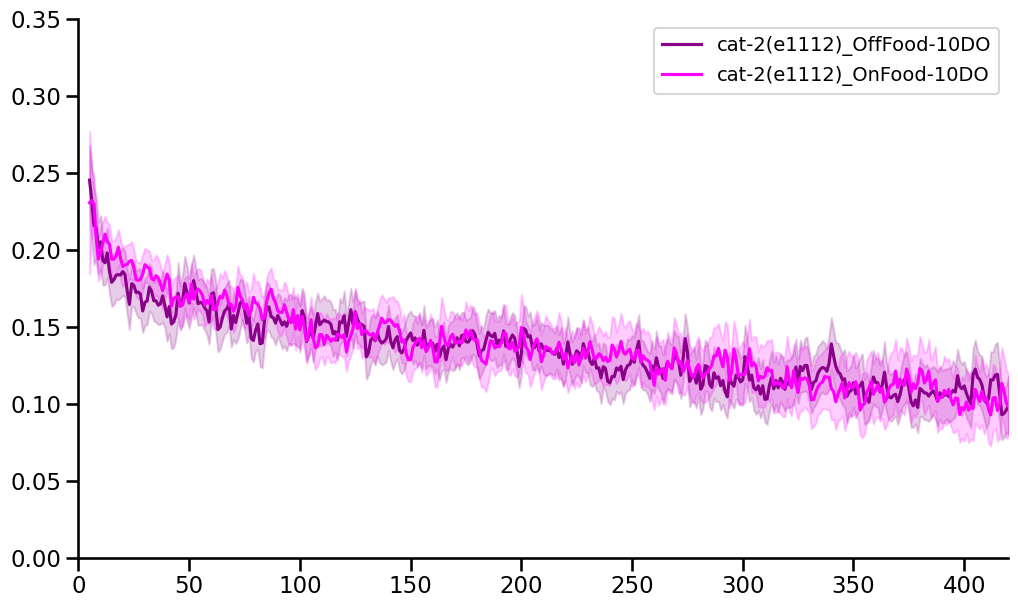

In [12]:
# Setting viewing range for your graph
top = 0.35
bottom = 0
left = 0
right = 420
xlabel = ""
ylabel = ""

sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(12,7))
plt.gca().xaxis.grid(False)
ax = sns.lineplot(x="time_bin", 
             y="speed", 
             data = TotalConcatenated,
             hue = 'Group',
             palette = [
                #  'grey',
                #         'black',
                        '#8B008B',
                        '#FF00FF',
                        
                        # 'green',
                        # 'lightgreen',
                        # 'royalblue',
                        # 'lightblue',
                        # '#FFB5C5',
                        # '#CD6889',
                        # 'maroon',
                        # 'firebrick'
                       ])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
# plt.title("Speed Trace")
plt.ylim(top = top)
plt.ylim(bottom = bottom)
plt.xlim(left= left)
plt.xlim(right = right)
ax.legend(loc = 'upper right', fontsize = '14')
sns.despine()
plt.savefig(f'Speed_Trace_{left}to{right}s.png', format='png', dpi=450, bbox_inches='tight')
plt.show()

# BSR bar plot (differences of differences)

Calculates worm speed average over designated time period

In [ ]:
TotalConcatenated['Genotype']

In [ ]:
# TotalConcatenated = pd.read_csv("/Users/Joseph/Desktop/BSR_baseline_output.csv")
# print(TotalConcatenated)
TotalConcatenated = TotalConcatenated.astype({'plate_id': int, 'worm':int, 'date':int})
# TotalConcatenated[['Genotype', 'Treatment']] = TotalConcatenated['Strain'].str.split('_', expand=True)
# TotalConcatenated['Gene'] = TotalConcatenated['Genotype'].str.split('(', expand=True)[0]
print(TotalConcatenated)

In [ ]:
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= 300]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= 400]
worm_chunkeddata_mean = chunkeddata.groupby(["Group","Genotype","Treatment","plate_id","date","worm"], as_index=False).mean()
print(worm_chunkeddata_mean)

In [ ]:
worm_chunkeddata_mean.to_csv("/Users/Joseph/Desktop/BSR_LRRK2Model_data_by_worm.csv")

# Done

In [ ]:
worm_chunkeddata_mean

In [ ]:
# worm_chunkeddata_mean[['Genotype', 'Treatment']] = worm_chunkeddata_mean['Group'].str.split('_', expand=True)
worm_chunkeddata_mean = worm_chunkeddata_mean.rename(columns={'Genotype':'Gene'})
worm_avg_speed = worm_chunkeddata_mean[['Gene', 'Treatment', 'speed']]
# worm_avg_speed = worm_avg_speed.rename(columns={'Genotype':'Gene'})
# worm_avg_speed = chunkeddata_mean[['Gene', 'Treatment', 'bias']]
avg_speed = worm_avg_speed.groupby(["Gene", 'Treatment'], as_index=False).mean()
print(avg_speed)
# print(avg_speed)

# avg_speed.to_csv("avg_speed.csv")
speed_diff = avg_speed.drop(columns=["Treatment"]).groupby("Gene", as_index=False).diff(periods=-1).dropna()
print("-"*40)
print(speed_diff)
# speed_diff.to_csv("speed_diff.csv")
speed_diff.reset_index(drop=False).dropna()
speed_diff.insert(loc=0, column='Gene', value=avg_speed['Gene'])
speed_diff=speed_diff.sort_values(by=["speed"])
# speed_diff=speed_diff.sort_values(by=["bias"])
# speed_diff=speed_diff.reset_index(drop=True).dropna()
print(speed_diff)
print(speed_diff.iloc[1,1])
speed_diff['Score']=speed_diff['speed']-speed_diff.iloc[1,1]
speed_diff=speed_diff.sort_values(by=["Score"])
print(speed_diff)

In [ ]:
Gene_Orthology=pd.read_csv('/Users/Joseph/Desktop/Gene_Orthology.csv')
Gene_Orthology=Gene_Orthology.rename(columns={"Gene":"Orthology", "Worm Gene":"Gene"}).drop(columns=["Unnamed: 0"])
print(Gene_Orthology)

In [ ]:
speed_diff=pd.merge(speed_diff,
                     Gene_Orthology,
                     on='Gene',
                     how='left')
speed_diff=speed_diff.rename(columns={"Gene":"Worm Gene", "Orthology":"Gene"})
print(speed_diff)

# Stats stuff from here..?

In [ ]:
worm_avg_speed

In [ ]:
worm_avg_speed.anova(dv="speed", between=["Gene","Treatment"])

In [ ]:
df1 = speed_diff[speed_diff.isna().any(axis=1)]
df1

In [ ]:
start = 300 #<----- set the start time of the range
point = 400 #<------- set the end time of your range
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]
chunkeddata_mean = chunkeddata.groupby(["Group","worm","plate_id","date"], as_index=False).mean()
chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Group'].str.split('_', expand=True)
worm_avg_speed = chunkeddata_mean[['Genotype', 'Treatment', 'Group', 'speed']]
avg_speed = worm_avg_speed.groupby(["Group", 'Treatment', 'Genotype'], as_index=False).mean()
print(avg_speed)
# print(avg_speed)

# avg_speed.to_csv("avg_speed.csv")

speed_diff = avg_speed.drop(columns=["Group", "Treatment"]).groupby("Genotype", as_index=False).diff(periods=-1)
# print(speed_diff)
# speed_diff.to_csv("speed_diff.csv")
speed_diff.reset_index(drop=False)
speed_diff.insert(loc=0, column='Genotype', value=avg_speed['Genotype'])
speed_diff=speed_diff.reset_index(drop=True).dropna()
print(speed_diff)
# print(speed_diff.iloc[1,1])
speed_diff['Score']=speed_diff['speed']-speed_diff.iloc[1,1]
speed_diff=speed_diff.sort_values(by=["Score"])
print(speed_diff)

In [ ]:
print(speed_diff.iloc[0,1])

In [ ]:
avg_speed["new"] = range(1,len(avg_speed)+1)
avg_speed.loc[avg_speed.index==4, 'new'] = 0
avg_speed.loc[avg_speed.index==4, 'new'] = 0
print(avg_speed)
# avg_speed.sort_values("new").drop('new', axis=1)

## Making the bar plot

In [ ]:
Title = "" #<---------------- Input Here -----------------
FileName = "BSR_bar"
sns.set_context("poster")
plt.figure(linewidth = 2)
plt.figure(figsize=(3, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Gene", 
             y = 'speed', 
             data = speed_diff.sort_values(by=["speed"]), #<--------------- Input Here -------------
             hue = 'Gene',
             palette= ['#FF00FF','black'],
             legend=False,
             hue_order = ['cat-2(e1112)','N2']
            #  edgecolor="DodgerBlue",
            #  linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("")
# plt.ylim(top = 0.1)
plt.ylim(bottom = -0.03)
plt.title(Title)
# ax.legend(fontsize = '14', frameon=True)
ax.tick_params(axis='x',length=1)
ax.set_xticklabels(['cat-2','N2'], fontsize=30)
# ax.set_xticks(labels=['cat-2','N2'])
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'{FileName}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [ ]:
speed_diff

# 8.3 Graphing Bar Graphs

# Speed Barplots Comparison

In [ ]:
# Valid Measurement inputs(change var)
# 1:'speed', <---
# 2: "x",
# 3: "y",
# 4: "angularspeed", <-----
# 5: "pathlength",
# 6: "kink",  <---
# 7: "bias", <----
# 8: "curve", <---
# 9: "dir",<----
# 10: "crab",<----
# 11: "length",<---
# 12: "midline",<----
# 13: "width",<----
# 14: "morphwidth",<----
# 15: "area"<----

start = 300
point = 400
var = "area"
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]
chunkeddata_mean = chunkeddata.groupby(["Strain","worm"], as_index=False).mean()
chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split(' - ', 1, expand=True)

Title = f"{var} - {start}-{point} seconds" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(15, 3))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = var, 
             data = chunkeddata_mean, #<--------------- Input Here -------------
             hue = 'Treatment',
             edgecolor="black",
             linewidth = 2.5,
#              seed=5,
             ci = 95, # 'sd' for SD, '68' for SEM
             palette = ['grey',
                        'black'
                       ]
                )
plt.xlabel("Strain and Condition")
# plt.ylabel("Average Speed (mm/s)")
plt.title(Title)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [ ]:
# Test Cell
# chunkeddata_mean

In [ ]:
# Test Cell
# TotalConcatenated.describe()
# chunkeddata0
# chunkeddata

# Bias Barplots Comparison

In [ ]:
point = 420
var = "bias"
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= 0]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]

Title = f"{var} - First {point} seconds" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = var, 
             data = chunkeddata, #<--------------- Input Here -------------
             hue = 'Treatment',
             edgecolor="black",
             linewidth = 2.5,
             ci = None,
             palette = ['black',
                        'grey'
                       ]
                )
plt.xlabel("Strain and Condition")
# plt.ylabel("Average Speed (mm/s)")
plt.title(Title)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

# Dispersion Plot (starburst) - *Not Functional In Current Iteration

In [ ]:
timepoint=60 # <---------------------- indicate end timepoint


chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= 0]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= timepoint]

Title = f"0 - {timepoint} seconds" #<--------------------
sns.set(context="talk")
# sns.set_context("talk", fontscale=0.5)
plt.figure(linewidth = 2.5)
plt.figure(figsize=(16, 4))
g = sns.FacetGrid(chunkeddata, row = "Treatment", col = "Genotype", margin_titles=True) #<--------------------------
g.map_dataframe(sns.scatterplot, "x_0", "y_0", hue="time", palette = "YlOrBr", linewidth=0, alpha=0.7, s=2)
g.set_axis_labels("x position", "y position")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
# g.fig.subplots_adjust(top=0.8)
g.fig.suptitle(f"{Title} Dispersion map", y=1.05)
g.tight_layout()
# plt.savefig(f'{Title} Dispersion map.png', format='png', dpi=900, bbox_inches = 'tight')

# Total Distance Traveled Trace - *Not Functional In Current Iteration

In [ ]:
start=50
timepoint=420 # <---------------------- indicate end timepoint


chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= timepoint]

Title = f"{start} - {timepoint} seconds" #<--------------------
sns.set(context="talk")
# sns.set_context("talk", fontscale=0.5)
plt.figure(linewidth = 2.5)
plt.figure(figsize=(16, 4))
g = sns.FacetGrid(chunkeddata, row = "Treatment", col = "Genotype", margin_titles=True, ylim=[0,15]) #<---- set y-lim
g.map_dataframe(sns.scatterplot, "time", "distance", hue="worm", palette = "colorblind", linewidth=0, alpha=0.7, s=2)
# g.set_axis_labels("x position", "y position")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
# g.fig.subplots_adjust(top=0.8)
g.fig.suptitle(f'{Title} Total Distance Traveled Trace', y=1.05)
g.tight_layout()
# plt.savefig(f'{Title} Total Distance Traveled Trace.png', format='png', dpi=900, bbox_inches = 'tight')

# Done!

In [ ]:
AfterOneHundredSecs = TotalConcatenated[TotalConcatenated["time_bin"] >= 100].reset_index(drop=True)
print(AfterOneHundredSecs)

In [ ]:
AfterOneHundredMean = AfterOneHundredSecs.groupby(["Strain", "worm", "Genotype", "Treatment"], as_index=False).mean()
print(AfterOneHundredMean)

In [ ]:
# Valid Measurement inputs(change var)
# 1:'speed', <---
# 2: "x",
# 3: "y",
# 4: "angularspeed", <-----
# 5: "pathlength",
# 6: "kink",  <---
# 7: "bias", <----
# 8: "curve", <---
# 9: "dir",<----
# 10: "crab",<----
# 11: "length",<---
# 12: "midline",<----
# 13: "width",<----
# 14: "morphwidth",<----
# 15: "area"<----


var = "speed"

Title = f"{var}" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(15, 3))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = var, 
             data = AfterOneHundredMean, #<--------------- Input Here -------------
             hue = 'Treatment',
             edgecolor="black",
             linewidth = 2.5,
#              seed=5,
             ci = 95, # 'sd' for SD, '68' for SEM
             palette = ['grey',
                        'black'
                       ]
                )
plt.xlabel("Strain and Condition")
# plt.ylabel("Average Speed (mm/s)")
plt.title(Title)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [ ]:
AfterOneHundredCAT.anova(dv="speed", between=["Genotype","Treatment"])

In [ ]:
AfterOneHundredTEST.anova(dv="speed", between=["Genotype","Treatment"]).round(7)